# Modern Computer Vision
<hr/>

## **Task**

## Sections

> - Installing OpenCV
> - Importing Libraries
> - Loading Images
> - Displaying Images
> - Displaying Image Dimensions
> - Converting Image to Gray Scale
> - Color Spaces
> - HSV Color Space
> - Viewing in each different channels of HSV Color Space (Hue, Saturation, Value)
> - Image Denoising
> - Sharpening Image
> - Edge Detection

**What is OpenCV ?** <br>
<br>
OpenCV-Python is a library of Python bindings designed to solve computer vision problems. OpenCV is a great tool for image processing and performing computer vision tasks. It is an open-source library that can be used to perform tasks like face detection, objection tracking, landmark detection, and much more.


### Installing OpenCV

In [1]:
#INSTALLING OpenCV

#pip install opencv-python

### Importing OpenCV

We use ``import cv2`` which is a module import name for opencv-python.

In [2]:
#IMPORTING OpenCV

import cv2

In [3]:
# WHICH VERSION OF OpenCV

print(cv2.__version__)

4.6.0


### Loading Images
We use ``cv2.imread()`` which is a method loads an image from the specified file.

In [4]:
#LOADING AN IMAGE

image = cv2.imread("pexels1.jpg")

### Displaying Images
We use ``plt.imshow()``, a matplotlib library is used to display data as an image

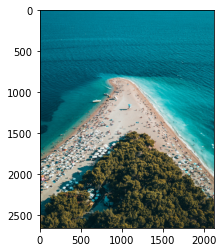

In [5]:
from matplotlib import pyplot as plt

#SHOW IMAGE WITH MATPLOTLIB

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

### **Displaying Image Dimensions**

Remember Images are arrays:

![](https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/array.png?token=ADLZD2HNEL33JAKTYRM3B5C7WMIV4)

For finding the image dimensions, we need to use numpy library.

In [6]:
#IMPORT NUMPY

import numpy as np

print(image.shape)

(2651, 2121, 3)


In [7]:
#For accessing a dimension

image.shape[0]

2651

You can understand that the first dimensions is its height, then width and depth respectively.

In [8]:
print('Height of Image: {} pixels'.format(int(image.shape[0])))
print('Width of Image: {} pixels'.format(int(image.shape[1])))
print('Depth of Image: {} colors components'.format(int(image.shape[2])))

Height of Image: 2651 pixels
Width of Image: 2121 pixels
Depth of Image: 3 colors components


### Converting the image to GrayScale
``Grayscaling`` is the process of converting an image from other color spaces e.g. RGB, CMYK, HSV, etc. to shades of gray. It varies between complete black and complete white.

In [9]:
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

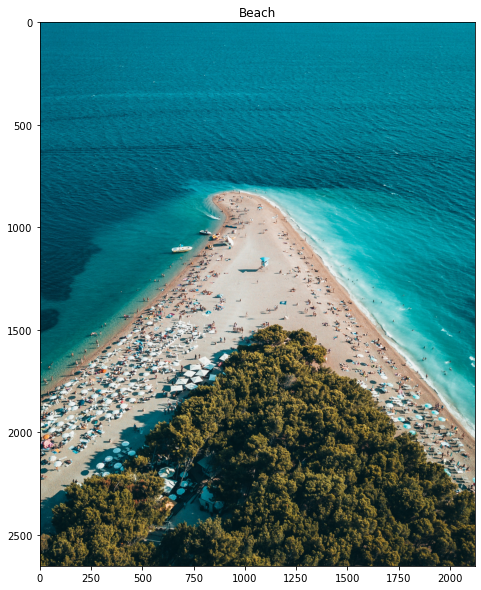

In [10]:
imshow("Beach", image)

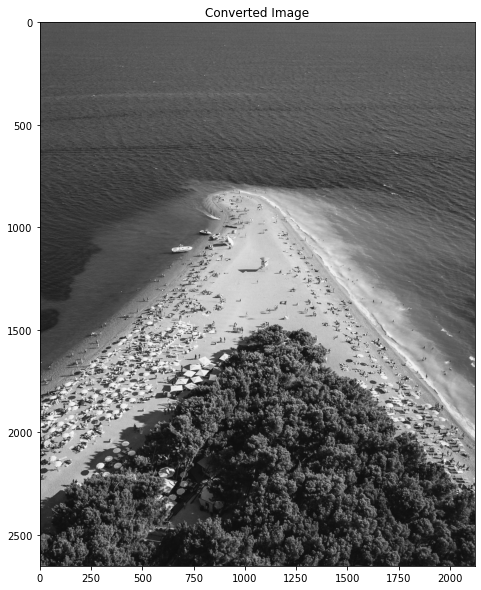

In [11]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow("Converted Image", gray_image)

In [12]:
image.shape

(2651, 2121, 3)

gray_image.shape

### Color Spaces
<br>

A ``color space`` is a useful conceptual tool for understanding the color capabilities of a particular device or digital file. When trying to reproduce color on another device, color spaces can show whether shadow/highlight detail and color saturation can be retained, and by how much either will be compromised.
<br>

There are several different color spaces and each has its own significance. Some of the popular color spaces are RGB (Red, Green, Blue), CMYK (Cyan, Magenta, Yellow, Black), HSV (Hue, Saturation, Value), etc.

In [13]:
# Use cv2.split to get each color space separately
B, G, R = cv2.split(image)
print(B.shape)
print(G.shape)
print(R.shape)

(2651, 2121)
(2651, 2121)
(2651, 2121)


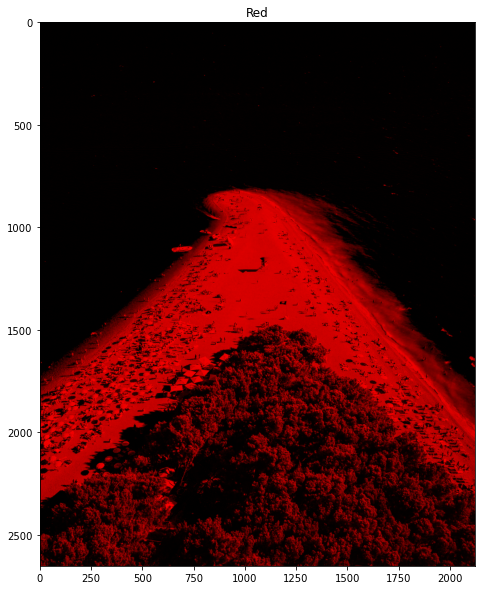

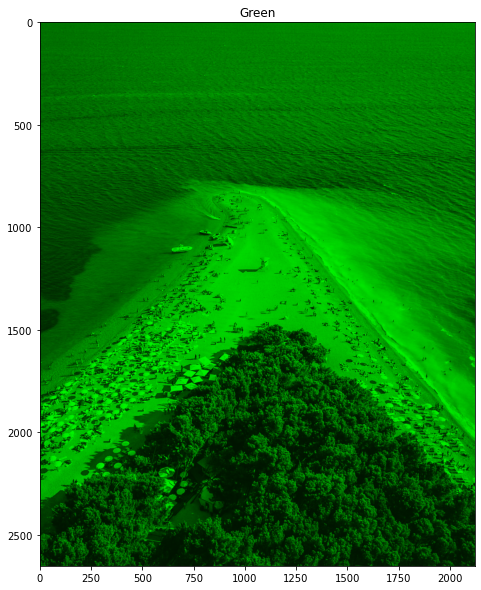

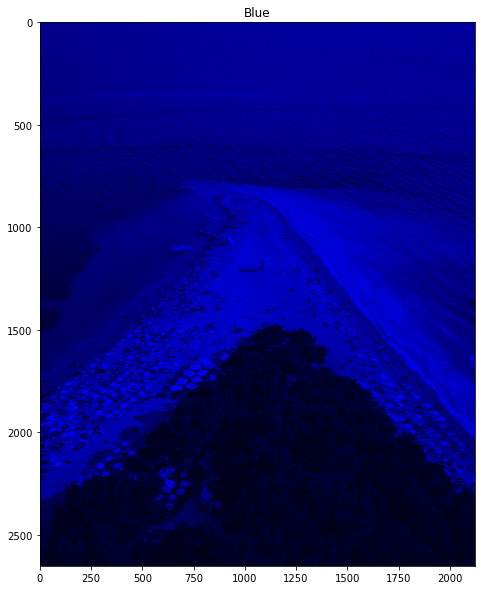

In [14]:
# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

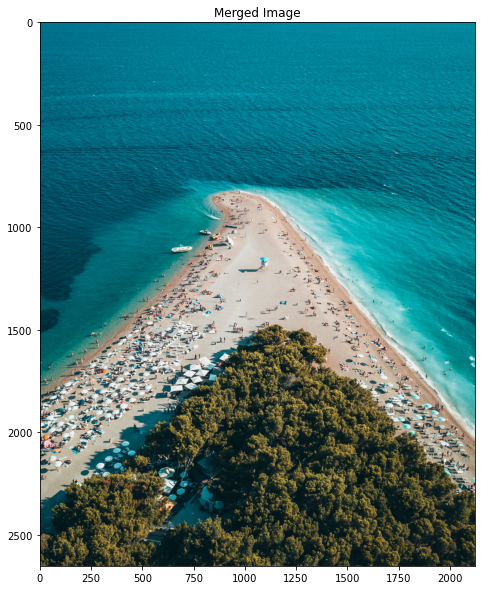

In [15]:
# SPLIT function is used to split the image's color into each color index

B, G, R = cv2.split(image)

#Remaking the original image

merge = cv2.merge([B, G, R])
imshow("Merged Image", merge)

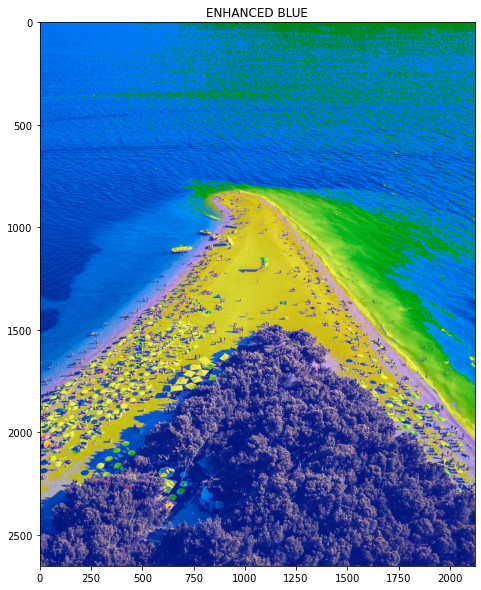

In [16]:
#TRYING TO ENHANCE THE BLUE COLOR IN THE PREVIOUS CODE

merge = cv2.merge([B+100, G, R])
imshow("ENHANCED BLUE", merge)

## **The HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179 
- Saturation: 0 - 255
- Value (Intensity): 0 - 255
<br>

- This color space describes colors (hue or tint) in terms of their shade (saturation or amount of gray) and their brightness value.
- Hue Saturation Value is used to separate image luminance from color information. This makes it easier when we are working on or need luminance of the image/frame.

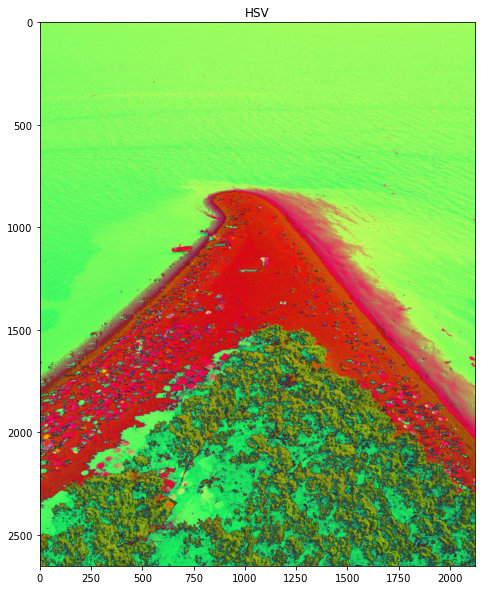

In [17]:
# RELOADING OUR IMAGE
image = cv2.imread("pexels1.jpg")

#CONVERT TO HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow("HSV", hsv_image)

#### This looks odd....why? 

Because our plotting function was designed for RGB only images, not HSV

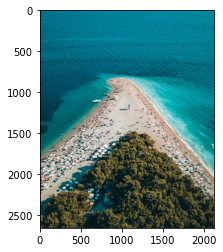

In [18]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

### Viewing each channel type in HSV Color Space Representation

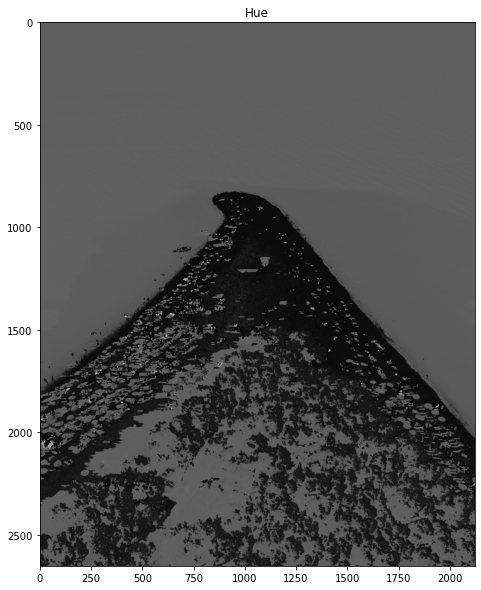

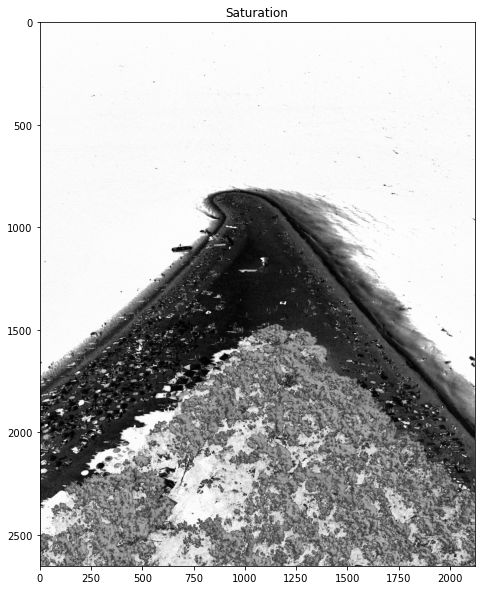

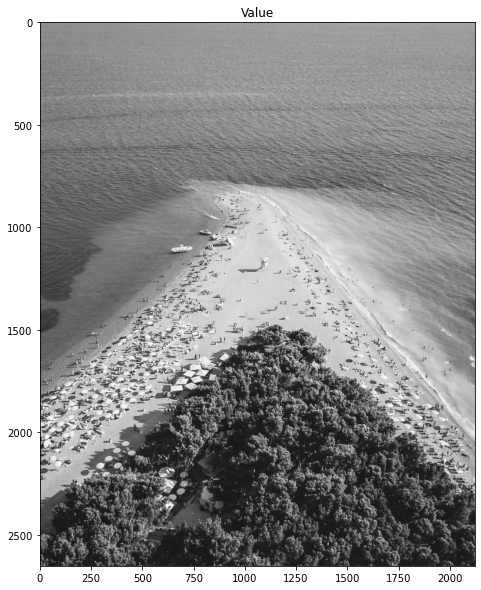

In [19]:
# Switching back to viewing the RGB representation
imshow("Hue", hsv_image[:, :, 0])
imshow("Saturation", hsv_image[:, :, 1])
imshow("Value", hsv_image[:, :, 2])

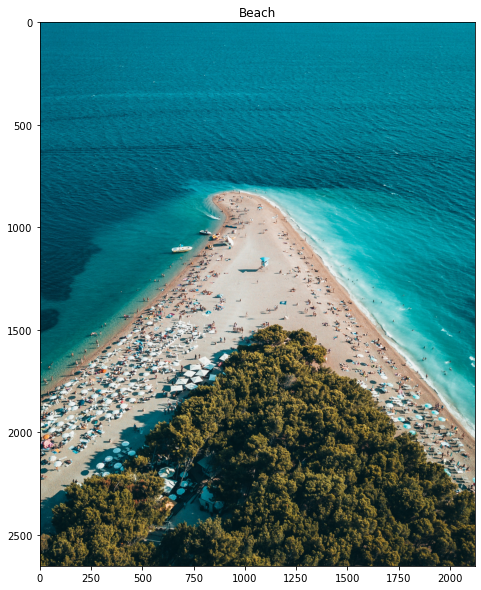

In [20]:
#AGAIN RELOADING THE ORIGINAL IMAGE
# RELOADING OUR IMAGE
image = cv2.imread("pexels1.jpg")

imshow("Beach", image)

### Image Denoising
#### Non-Local Means Denoising
<br>
**There are 4 variations of Non-Local Means Denoising:**

- cv2.fastNlMeansDenoising() - works with a single grayscale images
- cv2.fastNlMeansDenoisingColored() - works with a color image.
- cv2.fastNlMeansDenoisingMulti() - works with image sequence captured in short period of time (grayscale images)
- cv2.fastNlMeansDenoisingColoredMulti() - same as above, but for color images.

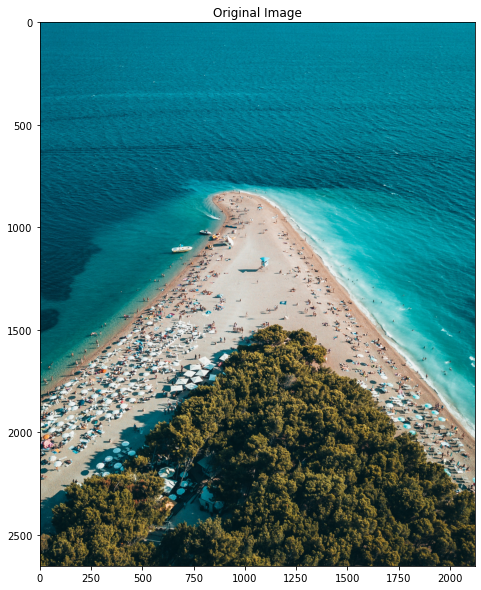

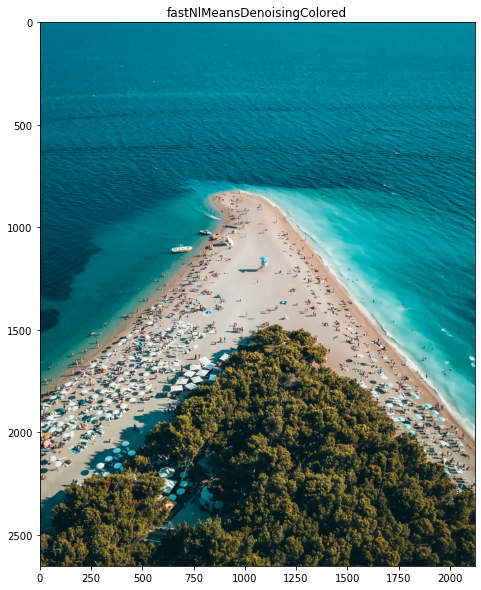

In [21]:
imshow('Original Image', image)

dst = cv2.fastNlMeansDenoisingColored(image, None, 5, 5, 6, 21)
imshow('fastNlMeansDenoisingColored', dst)

### Sharpening Images

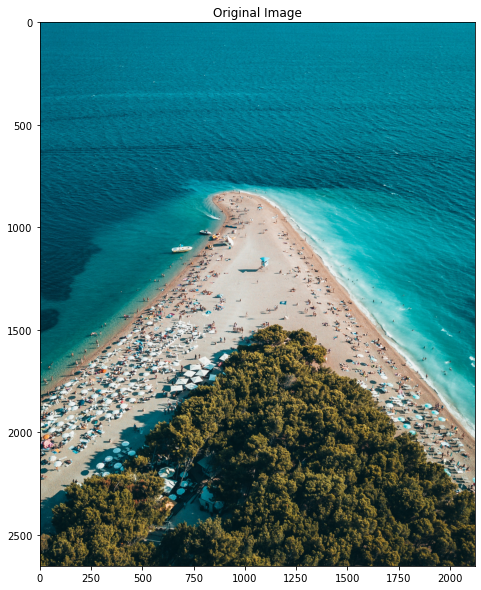

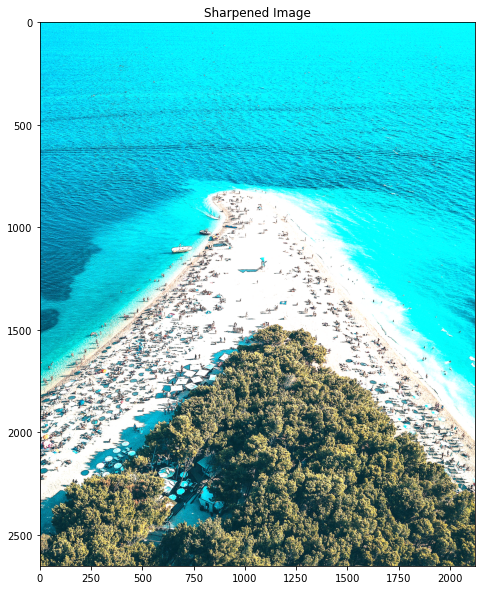

In [22]:
#LOADING IMAGE
imshow('Original Image', image)

#CREATING OUR SHARPENING KERNEL

kernel = np.array([[-1,-1,-1],
                   [-1,10,-1],
                   [-1,-1,-1,]])

#APPLYING THIS KERNEL SETTINGS TO THE EXISTING IMAGE

sharpened = cv2.filter2D(image, -1, kernel)
imshow("Sharpened Image", sharpened)

## **Canny Edge Detection** 
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Screenshot%202021-11-15%20at%205.24.15%20pm.png)

- The first argument is our input image.
- The second and third arguments are our minVal and maxVal respectively. 
- The forth argument is aperture_size. It is the size of Sobel kernel used for find image gradients. By default it is 3. 

Edge detection needs a threshold to tell what difference/change should be counted as edge

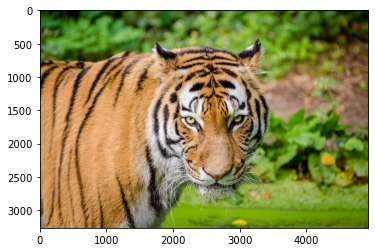

In [26]:
image_new = cv2.imread("pexels 2.jpg")

#SHOW IMAGE WITH MATPLOTLIB

plt.imshow(cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB))
plt.show()

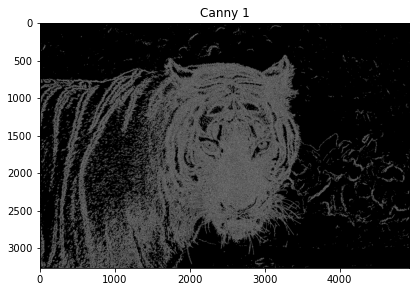

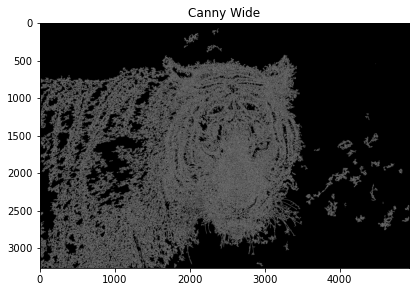

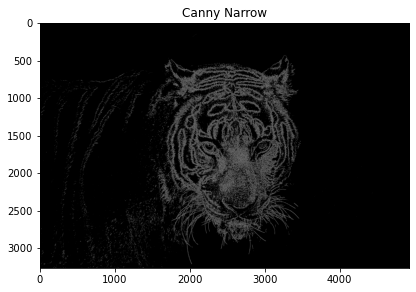

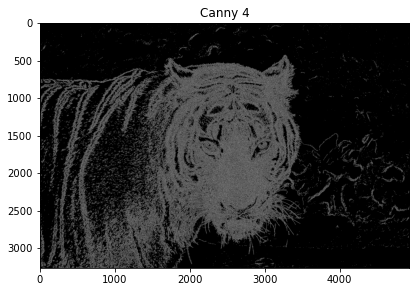

In [29]:
# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image_new, 50, 120)
imshow('Canny 1', canny)

# Wide edge thresholds expect lots of edges
canny = cv2.Canny(image_new, 10, 200)
imshow('Canny Wide', canny)

# Narrow threshold, expect less edges 
canny = cv2.Canny(image_new, 200, 240)
imshow('Canny Narrow', canny)

canny = cv2.Canny(image_new, 60, 110)
imshow('Canny 4', canny)

### Auto Canny

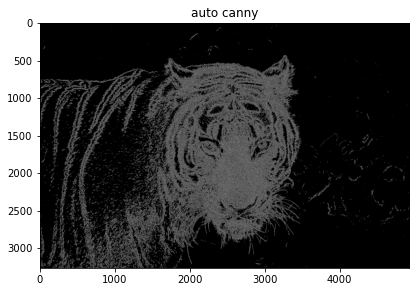

In [31]:
def autoCanny(image_new):
  # Finds optimal thresholds based on median image pixel intensity
  blurred_img = cv2.blur(image_new, ksize=(5,5))
  med_val = np.median(image_new) 
  lower = int(max(0, 0.66 * med_val))
  upper = int(min(255, 1.33 * med_val))
  edges = cv2.Canny(image=image_new, threshold1=lower, threshold2=upper)
  return edges

auto_canny = autoCanny(image_new)
imshow("auto canny", auto_canny)